# Post Processing

This notebook run some post processing on result point cloud. 
1. Convert point cloud to DEM with `point2dem` command from ASP.
2. Coregister with reference DEMs.
3. Compute difference between coregistered DEMs and references DEMs.
4. Compute some statistics of this difference.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import history

/home/godinlu/micromamba/envs/history/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Settings

In [ ]:
# contain the .las or .laz files
pointcloud_files = history.postprocessing.find_pointclouds("/mnt/summer/USERS/DEHECQA/history/output/extracted")
pointcloud_files = [f for f in pointcloud_files if "dense" in f]

# Directory where put DEMs after point2dem command
RAW_DEM_DIRECTORY = "/mnt/summer/USERS/DEHECQA/history/output/test_data/dems"

# Directory of coregistered DEMs
COREGISTERED_DEM_DIRECTORY = "/mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems"

# Directory of diference beetween ref DEMs and coregistered DEMs
DDEMS_DIRECTORY = "/mnt/summer/USERS/DEHECQA/history/output/test_data/ddems"
PLOTS_DIRECTORY = "/mnt/summer/USERS/DEHECQA/history/output/test_data/plots"

# dictionnary of all references DEMs
REF_DEMS = {
    # "casagrande_ref_dem_zoom" : "/mnt/summer/USERS/DEHECQA/history/data_final/casa_grande/aux_data/reference_dem_zoom.tif",
    "casagrande_ref_dem_zoom" : "/mnt/summer/USERS/DEHECQA/history/output/test_data/ref_lowres_dems/casa_grande_reference_dem_zoom_30m.tif",
    "casagrande_ref_dem_large" : "/mnt/summer/USERS/DEHECQA/history/data_final/casa_grande/aux_data/reference_dem_large.tif",
    "iceland_ref_dem_zoom" : "/mnt/summer/USERS/DEHECQA/history/output/test_data/ref_lowres_dems/iceland_reference_dem_zoom_30m.tif",
    "iceland_ref_dem_large" : "/mnt/summer/USERS/DEHECQA/history/data_final/iceland/aux_data/reference_dem_large.tif"
}

# dictionnary of all references DEMs masks 
REF_DEM_MASKS = {
    # "casagrande_ref_dem_zoom_mask" : "/mnt/summer/USERS/DEHECQA/history/data_final/casa_grande/aux_data/reference_dem_zoom_mask.tif",
    "casagrande_ref_dem_zoom_mask" : "/mnt/summer/USERS/DEHECQA/history/output/test_data/ref_lowres_dems/casa_grande_reference_dem_zoom_mask_30m.tif",
    "casagrande_ref_dem_large_mask" : "/mnt/summer/USERS/DEHECQA/history/data_final/casa_grande/aux_data/reference_dem_large_mask.tif",
    "iceland_ref_dem_zoom_mask" : "/mnt/summer/USERS/DEHECQA/history/output/test_data/ref_lowres_dems/iceland_reference_dem_zoom_mask_30m.tif",
    "iceland_ref_dem_large_mask" : "/mnt/summer/USERS/DEHECQA/history/data_final/iceland/aux_data/reference_dem_large_mask.tif"
}

# output csv file of statistics
POSTPROC_CSV = "/mnt/summer/USERS/DEHECQA/history/output/test_data/postprocess.csv"

OVERWRITE = False

# set this to True to avoid process
DRY_RUN = False

MAX_WORKERS = 4

## Init the post processing

with all pointcloud_files found with the `history.postprocessing.find_pointclouds` we can init the big dataframe.
also add the reference dems to indicate for each row the good one.
Then we keep only sparse pointcloud.

In [5]:


postproc = history.postprocessing.PostProcessing(
    pointcloud_files=pointcloud_files,
    raw_dems_directory=RAW_DEM_DIRECTORY,
    coregistered_dems_directory=COREGISTERED_DEM_DIRECTORY,
    ddems_before_directory=DDEMS_DIRECTORY,
    ddems_after_directory=DDEMS_DIRECTORY,
    plots_directory=PLOTS_DIRECTORY,
    postproc_csv=POSTPROC_CSV,
    **REF_DEMS,
    **REF_DEM_MASKS
)

## Converting cloud point to DEM

Batch process point cloud files in a directory to generate DEMs aligned with reference DEMs.

This function iterates over all point cloud files (*.las or *.laz) in `input_directory`,
selects the appropriate reference DEM based on site and dataset extracted from filenames,
and calls `point2dem` to create coregistered DEMs saved in `output_directory`.

The `max_workers` arg set a process for each point2dem command so for one file it's useless

Either you can use the `iter_point2dem_single_cmd` method wich will call `point2dem` one by one but with `MAX_WORKERS` for the command. This option is more safer for memory.

In [6]:
# postproc.iter_point2dem(OVERWRITE, DRY_RUN, asp_path=None, max_workers=MAX_WORKERS)
# or
postproc.iter_point2dem_single_cmd(OVERWRITE, True, asp_path=None, max_workers=MAX_WORKERS)

Skip lkugl_CG_AI_PP_CN_GN_PY_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/lkugl_CG_AI_PP_CN_GN_PY_MN-DEM.tif already exist.
Skip lkugl_CG_AI_PP_CN_GN_PY_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/lkugl_CG_AI_PP_CN_GN_PY_MN-DEM.tif already exist.
Skip lkugl_CG_AI_PP_CN_GN_PY_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/lkugl_CG_AI_PP_CN_GN_PY_MN-DEM.tif already exist.
Skip MicMac_CG_AI_PP_CY_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/MicMac_CG_AI_PP_CY_GY_PN_MN-DEM.tif already exist.
Skip lpierm_CG_AI_PP_CY_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/lpierm_CG_AI_PP_CY_GY_PN_MN-DEM.tif already exist.
Skip ESM_IL_AI_PP_CN_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/ESM_IL_AI_PP_CN_GY_PN_MN-DEM.tif already exist.
Skip ESM_IL_AI_RA_CN_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/dems/ESM_IL_AI_RA_CN_GY_PN_MN-DEM.tif already exist.
Skip ESM_IL_AI_RA_CY_GY_

### Clean up the RAW_DEM_DIRECTORY
Simply move log files into a folder and eventually remove temporary files

In [5]:
!mkdir -p {RAW_DEM_DIRECTORY}/log
!mv {RAW_DEM_DIRECTORY}/*-log-point2dem-*.txt {RAW_DEM_DIRECTORY}/log 2>/dev/null || true
!rm -f {RAW_DEM_DIRECTORY}/*-tmp-*.tif

## Coregister DEMs

Coregister multiple DEMs in a directory to appropriate reference DEMs and return summary statistics.

This function iterates over all DEM files in `input_directory` ending with '-DEM.tif', 
selects the appropriate reference DEM and mask based on the site and dataset information,
and applies coregistration using the `coregister_dem` function. 

Coregistered DEMs are saved to `output_directory`. If `overwrite` is False, existing output files are skipped.
If `dry_run` is True, no coregistration is performed, only file names and planned operations are printed.

In [11]:
postproc.iter_coregister_dems(OVERWRITE, False)

Skip AdinaR_CG_MC_PP_CY_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems/AdinaR_CG_MC_PP_CY_GY_PN_MN-DEM_coreg.tif already exist.
Skip ESM_IL_AI_RA_CN_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems/ESM_IL_AI_RA_CN_GY_PN_MN-DEM_coreg.tif already exist.
Skip HSfM_IL_AI_PP_CY_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems/HSfM_IL_AI_PP_CY_GY_PN_MN-DEM_coreg.tif already exist.
Skip ESM_CG_AI_PP_CN_GY_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems/ESM_CG_AI_PP_CN_GY_PN_MN-DEM_coreg.tif already exist.
Skip ASPY_CG_MC_PP_CN_GN_PN_MN : /mnt/summer/USERS/DEHECQA/history/output/test_data/coregistered_dems/ASPY_CG_MC_PP_CN_GN_PN_MN-DEM_coreg.tif already exist.
coregister_dem(/mnt/summer/USERS/DEHECQA/history/output/test_data/dems/TUW_IL_AI_PP_CN_GN_PN_MN-DEM.tif, /mnt/summer/USERS/DEHECQA/history/output/test_data/ref_lowres_dems/iceland_reference_dem_zoom_30m.tif, /mnt/su

,coreg_shift_x,coreg_shift_y,coreg_shift_z,mean_before_coreg,median_before_coreg,nmad_before_coreg,mean_after_coreg,median_after_coreg,nmad_after_coreg
code,,,,,,,,,
bob_IL_MC_PP_CY_GY_PN_MN,18.005219,15.543525,2.518967,0.452082,-2.422913,5.933024,2.852056,0.0,5.444193
bob_IL_MC_RA_CY_GY_PN_MN,12.161558,9.793807,1.126343,3.083646,-1.011990,6.180295,4.137456,0.0,5.911940


## Generate some plots

In [12]:
global_df = postproc.compute_global_df()
global_df.to_csv(POSTPROC_CSV)

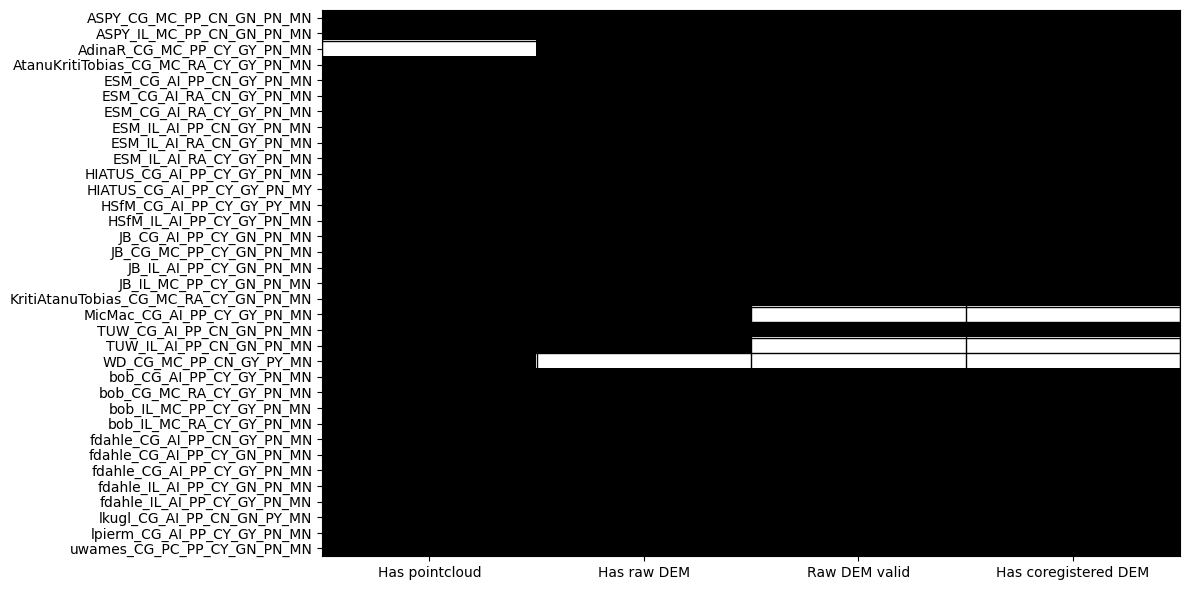

In [13]:
history.postprocessing.plotting2.plot_postprocess_state(global_df)

In [ ]:
import numpy as np

df = global_df.dropna(subset="nmad_before_coreg").copy()
group_cols = ["dataset", "site"]
col = "nmad_before_coreg"
k = 4  # use 3 or 4

# --- compute median and MAD per group (aligned to original index) ---
median = df.groupby(group_cols)[col].transform("median")
mad = df.groupby(group_cols)[col].transform(lambda x: np.median(np.abs(x - np.median(x))))

# normalize MAD to be comparable to std (for normal dist: sigma ≈ MAD * 1.4826)
normalized_mad = mad * 1.4826

# filter outliers above the threshold
mask =  df[col] <= median + k * normalized_mad

df["is_outlier"] = ~mask

df.loc[df["is_outlier"]]


,author,site,dataset,images,camera_used,gcp_used,pointcloud_coregistration,mtp_adjustment,pointcloud_file,raw_dem_file,...,coreg_shift_x,coreg_shift_y,coreg_shift_z,mean_before_coreg,median_before_coreg,nmad_before_coreg,mean_after_coreg,median_after_coreg,nmad_after_coreg,is_outlier
code,,,,,,,,,,,,,,,,,,,,,
fdahle_CG_AI_PP_CN_GY_PN_MN,fdahle,casa_grande,aerial,preprocessed,False,True,False,False,/mnt/summer/USERS/DEHECQA/history/output/extra...,/mnt/summer/USERS/DEHECQA/history/output/test_...,...,-1494.661626,457.998316,0.756195,-1.710645,-3.173859,7.678138,1.556604,0.000000,7.879095,True
fdahle_CG_AI_PP_CY_GN_PN_MN,fdahle,casa_grande,aerial,preprocessed,True,False,False,False,/mnt/summer/USERS/DEHECQA/history/output/extra...,/mnt/summer/USERS/DEHECQA/history/output/test_...,...,10141.567582,1293.896290,577.203125,-559.596070,-569.558350,43.412743,0.857168,0.000015,71.029430,True
fdahle_IL_AI_PP_CY_GN_PN_MN,fdahle,iceland,aerial,preprocessed,True,False,False,False,/mnt/summer/USERS/DEHECQA/history/output/extra...,/mnt/summer/USERS/DEHECQA/history/output/test_...,...,147.126380,-21.562636,4.782547,-0.962673,-6.486496,23.830980,5.010852,0.000000,25.376675,True
fdahle_IL_AI_PP_CY_GY_PN_MN,fdahle,iceland,aerial,preprocessed,True,True,False,False,/mnt/summer/USERS/DEHECQA/history/output/extra...,/mnt/summer/USERS/DEHECQA/history/output/test_...,...,10.172176,-3.338206,0.522545,-1.773083,-0.618774,4.942399,-1.132904,0.000008,5.075161,True
lkugl_CG_AI_PP_CN_GN_PY_MN,lkugl,casa_grande,aerial,preprocessed,False,False,True,False,/mnt/summer/USERS/DEHECQA/history/output/extra...,/mnt/summer/USERS/DEHECQA/history/output/test_...,...,-412.995648,-1035.123581,-30.426941,30.213003,31.104523,3.506787,-1.021481,0.000000,2.770192,True


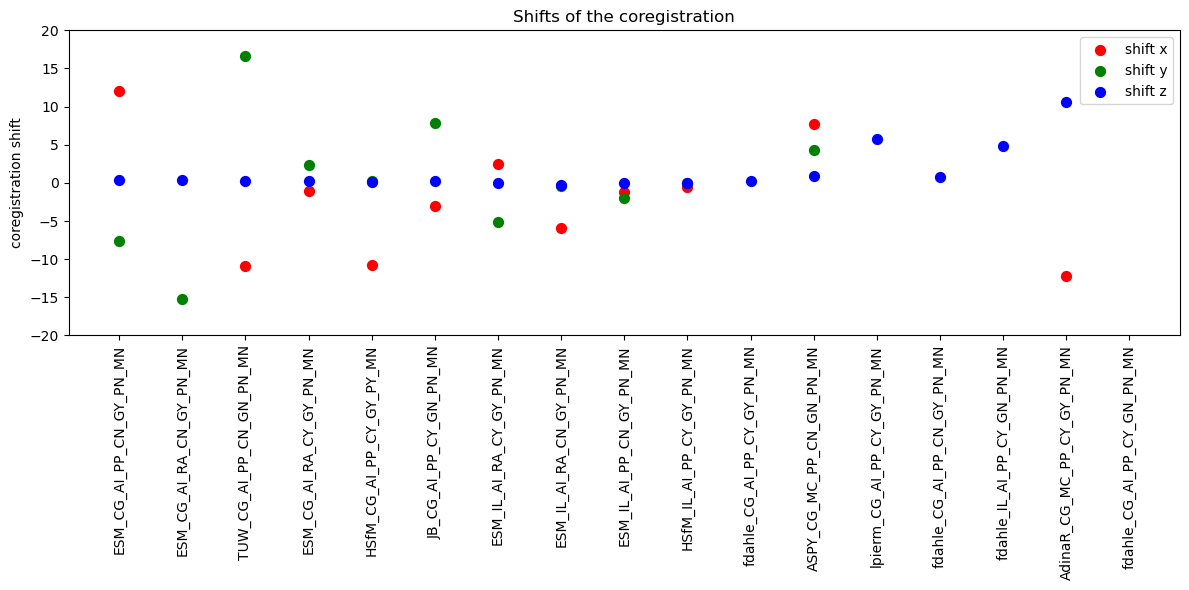

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# Trier par nmad
df = coreg_stats.sort_values("nmad_before_coreg")

# Positions X
x = range(len(df))

# Plot
fig, ax = plt.subplots(figsize=(12,6))

colors = ["red", "green", "blue"]
labels = ["shift x", "shift y", "shift z"]

for col, color, label in zip(["coreg_shift_x","coreg_shift_y","coreg_shift_z"], colors, labels):
    ax.scatter(x, df[col], color=color, s=50, label=label)

ax.set_title("Shifts of the coregistration")
ax.set_ylim(-20, 20)
ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90)

ax.set_ylabel("coregistration shift")
ax.legend()
plt.tight_layout()
plt.show()
